In [2]:
!pip install gensim

In [3]:
import gensim
import numpy as np
import pandas as pd
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from collections import defaultdict

In [13]:
df=pd.read_csv('ap (2).csv')

In [44]:
df.columns=[0,1]
df.dropna()
df.describe()

,0,1
count,2249,2247
unique,2249,2246
top,AP880818-0299,The following are the most popular videocasset...
freq,1,2


In [50]:
df[1][1148]

nan

In [ ]:
df=df.drop([1148],axis=0)    

In [58]:
df=df.drop([1529],axis=0)

In [59]:
df.shape

(2247, 2)

In [60]:
df=df.reset_index()

In [19]:
 stoplist=(
"a about above after again against all am an and any are aren't as at be because been before being below between both but by can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once only or other ought our ours ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves").split(' ')
  

In [20]:
len(stoplist)
stoplist.append('')

In [63]:
text=[]
charToReplace=['\n',':',',',';','.','?','!','  ','(',')',']','[']
doc=0;
for j in range(0,2247):
  textEntry=[]
  sent=df[1][j].lower()
  for charr in charToReplace:
    sent=sent.replace(charr,' ')
  sent1=sent.split(' ')
  for token in sent1:
    if token not in stoplist:
      textEntry.append(token)
  text.append(textEntry)

In [ ]:
text[0]

In [65]:
frequency = defaultdict(int)
for sWiseText in text:
    for token in sWiseText:
        frequency[token] += 1

In [67]:
texts = [
    [token for token in te if frequency[token] > 1]
    for te in text
]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(tex) for tex in texts]

In [68]:
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [69]:
from gensim.models.coherencemodel import CoherenceModel
coherence_values = []
model_list = []
for n in range(5,200 ,10):
  model_ = models.LdaModel(corpus_tfidf, id2word = dictionary ,num_topics=n)  
  model_list.append(model_)
  coherencemodel = CoherenceModel(model=model_, texts=texts, dictionary=dictionary, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


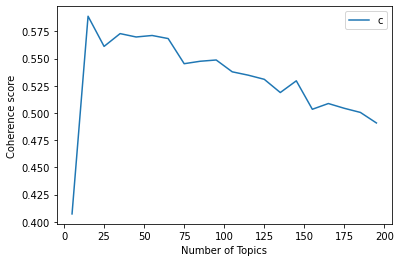

In [73]:
import matplotlib.pyplot as plt
x = range(5, 200, 10)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
 lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=15)
 corpus_lda = lda_model[corpus_tfidf] 
lda_model.print_topics(15)

In [ ]:
coherence_values

In [75]:
 lda_model.print_topics(15)

[(0,
  '0.015*"said" + 0.008*"\'\'" + 0.005*"stock" + 0.004*"corroon" + 0.004*"cdy" + 0.004*"percent" + 0.004*"market" + 0.004*"black" + 0.004*"clr" + 0.004*"2"'),
 (1,
  '0.015*"said" + 0.011*"\'\'" + 0.005*"poll" + 0.005*"dukakis" + 0.005*"new" + 0.005*"percent" + 0.004*"will" + 0.003*"party" + 0.003*"also" + 0.003*"last"'),
 (2,
  '0.024*"said" + 0.012*"\'\'" + 0.007*"year" + 0.006*"percent" + 0.006*"s" + 0.006*"u" + 0.004*"will" + 0.004*"last" + 0.004*"owen" + 0.003*"united"'),
 (3,
  '0.027*"said" + 0.011*"percent" + 0.010*"\'\'" + 0.005*"million" + 0.004*"1" + 0.004*"u" + 0.003*"will" + 0.003*"soviet" + 0.003*"two" + 0.003*"president"'),
 (4,
  '0.021*"said" + 0.010*"\'\'" + 0.005*"president" + 0.005*"bush" + 0.005*"dresses" + 0.005*"will" + 0.004*"at&t" + 0.004*"s" + 0.004*"macmillan" + 0.003*"u"'),
 (5,
  '0.019*"said" + 0.011*"\'\'" + 0.006*"will" + 0.006*"000" + 0.005*"u" + 0.005*"s" + 0.004*"pacs" + 0.004*"new" + 0.004*"court" + 0.003*"united"'),
 (6,
  '0.014*"said" + 0.010

In [77]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.6MB/s 
     |████████████████████████████████| 552kB 16.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=e9025ddc06081667914b7fb6fe6b42f9351b45cd8229f9f57851c0161cb0cb2a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=2f789f4d9380bf179d2120990dbee360d5b29d2065adf97cc891ffb5a700d3a7
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [78]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.048280 -0.018727       1        1  20.800381
8      0.057934 -0.011649       2        1  13.439080
11     0.002357 -0.069416       3        1  12.467298
13    -0.017177 -0.037168       4        1  11.200355
14     0.033543  0.021644       5        1   7.217916
10    -0.059723  0.015524       6        1   5.864510
5      0.025695 -0.020935       7        1   5.756412
7      0.074288  0.048333       8        1   5.400925
3     -0.035792 -0.017761       9        1   5.241391
2     -0.000308 -0.049425      10        1   4.441432
6     -0.075256 -0.000532      11        1   2.798848
4      0.030700  0.032211      12        1   2.545049
0     -0.081696  0.040899      13        1   1.510494
9     -0.002403  0.028677      14        1   0.719651
1     -0.000442  0.038324      15        1   0.596261, topic_info=         Term          Freq         Total Category  logprob  loglift
165      said  12224.000000  12224.000000  Default  30.0000  30.0000
5          ''   8607.000000   8607.000000  Default  29.0000  29.0000
132   percent   2109.000000   2109.000000  Default  28.0000  28.0000
206      will   2473.000000   2473.000000  Default  27.0000  27.0000
519       new   1931.000000   1931.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
591         u      7.035449   1799.193848  Topic15  -6.1528  -0.4219
197      told      6.073157    774.541504  Topic15  -6.2999   0.2739
127       one      6.727368   1848.298218  Topic15  -6.1976  -0.4936
584     three      6.025514    801.944153  Topic15  -6.3078   0.2312
2673    among      5.837230    579.084351  Topic15  -6.3395   0.5251

[1247 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.105705    $1
0         2  0.079866    $1
0         3  0.145638    $1
0         4  0.185571    $1
0         5  0.042282    $1
...     ...       ...   ...
600      11  0.035804  york
600      12  0.010025  york
600      13  0.022915  york
600      14  0.004296  york
600      15  0.011457  york

[4912 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 9, 12, 14, 15, 11, 6, 8, 4, 3, 7, 5, 1, 10, 2])

In [81]:
pyLDAvis.save_html(vis,'vis_task5.html')